In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test
from sklearn.model_selection import train_test_split, GridSearchCV
from lifelines.utils.sklearn_adapter import sklearn_adapter
from sklearn import metrics
import time
import traceback

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.drop("customerID", axis=1, inplace=True)
data["TotalChareges"] = pd.to_numeric(data.TotalCharges, errors="coerce")
data.dropna(subset=["TotalChareges"], inplace=True)
data = data.reset_index().drop("index", axis=1)
data.SeniorCitizen = data.SeniorCitizen.astype("str")
# data.TotalChareges = data.TotalChareges.astype("float")
data.Churn = data.Churn.map({"Yes": 1, "No": 0})
df = pd.get_dummies(data)

In [39]:
# fig, ax = plt.subplots(figsize=(10, 8))
# kmf = KaplanMeierFitter()
# kmf.fit(data.tenure, event_observed=data.Churn)
# kmf.plot_survival_function(at_risk_counts=True, ax=ax)
# plt.show()

In [17]:
data["MonthlyCharges_median"] = data["MonthlyCharges"].apply(lambda x: "1" if x >= data["MonthlyCharges"].median() else "0")
data["TotalCharges_median"] = data["TotalCharges"].apply(lambda x: "1" if float(x) >= data["TotalCharges"].median() else "0")

TypeError: could not convert string to float: ''

In [26]:
data["MonthlyCharges"]

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7027     84.80
7028    103.20
7029     29.60
7030     74.40
7031    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

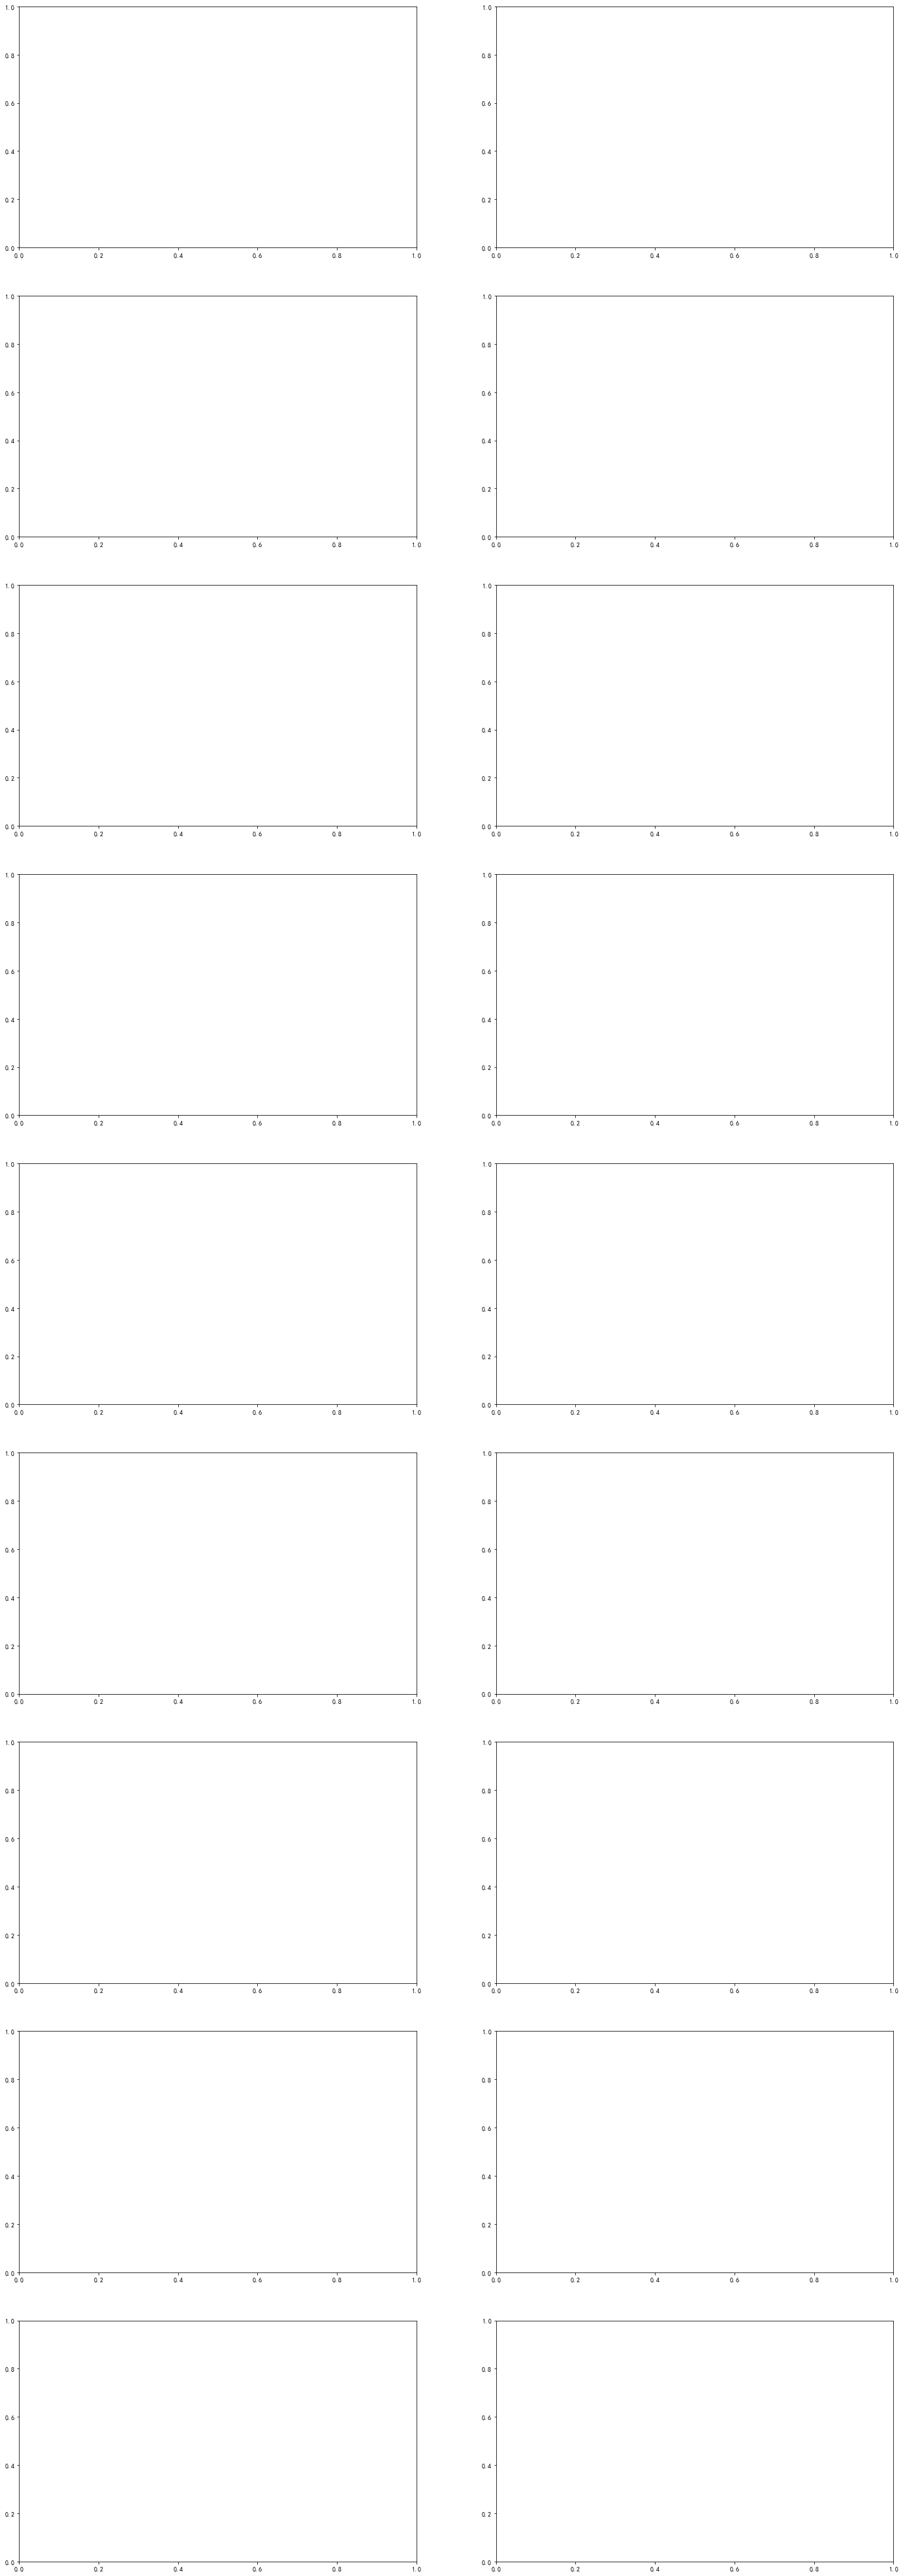

In [8]:
obj_list = data.select_dtypes(include=["object"]).columns
obj_list = obj_list.drop("TotalCharges")
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(24, 72))

In [11]:
print(obj_list)
len(obj_list)
print(type(data.TotalCharges[0]))
print(type(data.MonthlyCharges[0]))

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')
<class 'str'>
<class 'numpy.float64'>


In [15]:
obj_list.drop("TotalCharges")
# print(len(obj_list))

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [57]:
for nrow in range(9):
    for ncol in range(2):
        feature = obj_list[nrow * 2 + ncol]
        print(f"{nrow}, {ncol}, {feature}")
        for i in data[feature].unique():
            kmf = KaplanMeierFitter()
            df_tmp = data.loc[data[feature] == i]
            kmf.fit(df_tmp.tenure, event_observed=df_tmp.Churn, label=i)
            kmf.plot_survival_function(ci_show=True, ax=ax[nrow, ncol])
        
        p_value = multivariate_logrank_test(event_durations=data.tenure,
                                            groups=data[feature],
                                            event_observed=data.Churn).p_value
        p_value_text = ["p-value < 0.001" if p_value < 0.001 else "p-value = %.4F"%p_value][0]
        ax[nrow][ncol].set_title(f"survival curves of {feature} \n logrank test: {p_value_text}")


0, 0, gender
0, 1, SeniorCitizen
1, 0, Partner
1, 1, Dependents
2, 0, PhoneService
2, 1, MultipleLines
3, 0, InternetService
3, 1, OnlineSecurity
4, 0, OnlineBackup
4, 1, DeviceProtection
5, 0, TechSupport
5, 1, StreamingTV
6, 0, StreamingMovies
6, 1, Contract
7, 0, PaperlessBilling
7, 1, PaymentMethod
8, 0, TotalCharges


KeyboardInterrupt: 

In [56]:
fig.tight_layout()
plt.show()